## Phase I : Merging, Data Exploration & EDA

In [1]:
# General import
import os
import glob
import pandas as pd
from pandas_profiling import ProfileReport
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from joblib import Parallel, delayed
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import time
import os
from itertools import product
from pylab import rcParams
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from statsmodels.tsa.deterministic import DeterministicProcess,CalendarFourier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Plotting import
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import datetime
from scipy.stats import skew,norm,zscore
from scipy.signal import periodogram

In [2]:
# Defines path to csv files
path = "Dataset//store-sales-time-series-forecasting//"
#path = ""

####  Section 1 : Merging the csv files 

In [3]:
# reading two csv files
data0 = pd.read_csv(path + 'test.csv', index_col=False)
data1 = pd.read_csv(path + 'train.csv', index_col=False)
data2 = pd.read_csv(path + 'transactions.csv', index_col=False)
  
# using merge function by setting how='left'
output = pd.merge(data1, data2,
                   on=['date','store_nbr'], 
                   how='left')
output_ = pd.merge(data0, data2,
                   on=['date','store_nbr'], 
                   how='left')
  
#Saving our combined csv data as a new file, all the files end with_ is for testing data.
#output.to_csv(path + 'combine.csv', index=False)
#output_.to_csv(path + 'combine_.csv', index=False)
data1.to_csv(path + 'combine.csv', index=False)
data0.to_csv(path + 'combine_.csv', index=False)

# displaying result
print(data1.shape)
print(data2.shape)
print(output.shape)
output.head()

(3000888, 6)
(83488, 3)
(3000888, 7)


,id,date,store_nbr,family,sales,onpromotion,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN


In [4]:
# reading two csv files
data0 = pd.read_csv(path + 'combine_.csv', index_col=False)
data1 = pd.read_csv(path + 'combine.csv', index_col=False)
data2 = pd.read_csv(path + 'oil.csv', index_col=False)
  
# using merge function by setting how='left'
output1 = pd.merge(data1, data2, 
                   on='date',
                   how='left')
output1_ = pd.merge(data0, data2, 
                   on='date',
                   how='left')
  
#Saving our combined csv data as a new file
output1.to_csv(path + 'combine1.csv', index=False)
output1_.to_csv(path + 'combine1_.csv', index=False)

# displaying result
print(data0.shape)
print(data2.shape)
print(output1_.shape)
output1.head()

(28512, 5)
(1218, 2)
(28512, 6)


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN


In [5]:
# reading two csv files
data0 = pd.read_csv(path + 'combine1_.csv', index_col=False)
data1 = pd.read_csv(path + 'combine1.csv', index_col=False)
data2 = pd.read_csv(path + 'stores.csv', index_col=False)
  
# using merge function by setting how='left'
output2 = pd.merge(data1, data2, 
                   on='store_nbr', 
                   how='left')
output2_ = pd.merge(data0, data2, 
                   on='store_nbr', 
                   how='left')

#Saving our combined csv data as a new file
output2.to_csv(path + 'combine2.csv', index=False)
output2_.to_csv(path + 'combine2_.csv', index=False)

# displaying result
output2.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13


In [6]:
# reading two csv files
data0 = pd.read_csv(path + 'combine2_.csv', index_col=False)
data1 = pd.read_csv(path + 'combine2.csv', index_col=False)
data2 = pd.read_csv(path + 'holidays_events.csv', index_col=False)
  
# using merge function by setting how='left'
output3 = pd.merge(data1, data2, 
                   on='date', 
                   how='left')
output3_ = pd.merge(data0, data2, 
                   on='date', 
                   how='left')
  
#Saving our combined csv data as a new file
output3.to_csv(path + 'combine3.csv', index=False)
output3_.to_csv(path + 'combine3_.csv', index=False)

# displaying result
output3.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [7]:
# reading two csv files
df = pd.read_csv(path + 'combine3.csv', index_col=False)
df_ = pd.read_csv(path + 'combine3_.csv', index_col=False)

#Selecting the "description" column and axis=1 as we are delecting the column
final = df.drop(columns='description',axis=1)
final_ = df_.drop(columns='description',axis=1)

#Saving our combined csv data as a new file
final.to_csv(path + 'final.csv', index=False)
final_.to_csv(path + 'final_.csv', index=False)

# displaying result
final.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False


#### Section 2 : Data Exploration

In [8]:
#Reading the csv
data = pd.read_csv(path + 'final.csv', index_col=False)

#For checking the total number of rows and columns in the dataset
data.shape

(3054348, 15)

In [9]:
#For analysing the dataset statisctically
data.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


In [10]:
#For checking the unique values in the dataset
data.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dcoilwtico         994
city                22
state               16
str_type             5
cluster             17
type                 6
locale               3
locale_name         24
transferred          2
dtype: int64

In [11]:
#Checking for NUll values in the dataset
data.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      955152
city                 0
state                0
str_type             0
cluster              0
type           2551824
locale         2551824
locale_name    2551824
transferred    2551824
dtype: int64

1. Here, "dcoilwtico" (oil price) column has a lot of NULL values, because there are no oil prices during the weekend and holidays. We will need to fill this column using nearest value or some average value.
2. The last four attributes are related to holidays, not everyday is a holiday, therefore, we have a lot of NULL here.

#### Section 3 : Exploratory Data Analysis

##### Relationship Analysis

##### 1. Correlation Matrix : 
A correlation matrix is simply a table which displays the correlation. It is best used in variables that demonstrate a linear relationship between each other i.e. coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.

In [12]:
# Dropping the coulmn "id" from the dataset as it isn't a significant coulmn for correlation matrix
data1 = data.drop(columns='id',axis=1)
correlation = data1.corr()
data1.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,False


<AxesSubplot:>

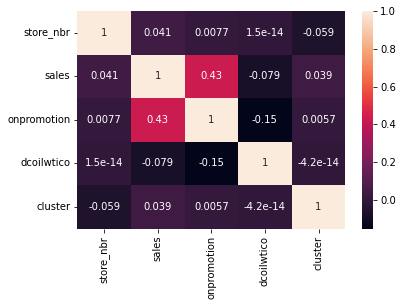

In [13]:
#Plotting the heatmap for correlation matrix
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

The correlation matrix shows a strong relation between 'sales' and 'onpromotion'. That infers that we there is a promotional sale going on in a store, the sales are also high. 

##### Daily Average Sales by All Store

Now we try to analyse the sales of the stores in their repective area. Below is the calculation of sales taking average daily for the whole period of 1600 days

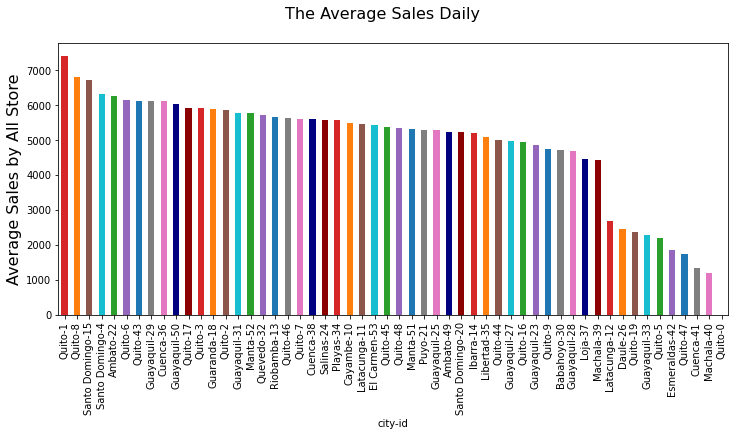

In [14]:
stores_data = pd.read_csv(path + 'stores.csv', index_col=False)
top_city  = stores_data.groupby('city') .size().sort_values(ascending=False)
top_state = stores_data.groupby('state').size().sort_values(ascending=False)
states = top_state.index.values
color = ["tab:red","tab:orange","tab:brown","tab:cyan","tab:green","tab:purple","tab:blue","tab:gray","tab:pink", "navy","darkred"]
store_nbr_id  = stores_data.index.values # stores_data.store_nbr.unique()
train_data = pd.read_csv(path + 'train.csv', index_col="id", header=0, parse_dates=['date'])
sales_grouped = train_data.groupby(['store_nbr','date']).agg({'sales':'sum'})
sales_by_store_id = {}
for store in store_nbr_id:
    sales_by_store_id[store] = {'sale': sales_grouped.iloc[store].sales.mean() ,
                                'city': stores_data.city[store] ,
                                'city-id': stores_data.city[store]+"-{}".format(store) ,
                                'state': stores_data.state[store] ,
                                'type': stores_data.str_type[store] ,
                                'cluster': stores_data.cluster[store] }
# Convert to Pandas DataFrame 
sales_by_store_id = pd.DataFrame.from_dict(sales_by_store_id, orient='index') 

sales_by_city      = {}
for city in top_city.index.values:
    sales_by_city[city]      = {'sum': sales_by_store_id [ stores_data.city==city ].sale.sum(),
                                'mean': sales_by_store_id [ stores_data.city==city ].sale.mean() }
sales_by_city      = pd.DataFrame.from_dict(sales_by_city, orient='index')
# Sorting 
sales_by_store_id.sort_values( by='sale', inplace=True, ascending=False )
sales_by_city_sum  = sales_by_city.sort_values( by='sum', ascending=False )
# Ploting
figsize = (12,5)
fig, ax0 = plt.subplots(figsize=figsize)
sales_by_store_id.plot(kind="bar",x='city-id',y='sale',figsize=figsize, ax=ax0,color=color, align='center', legend=False)
plt.suptitle("The Average Sales Daily",  fontsize=16, ha='center')
ax0.set_ylabel('Average Sales by All Store',  fontsize=16);

Average Daily Sales in all Stores : There are 54 stores at different locations (including different cities and states). However, the averages of sales per day are not similar. Most effective stores are located in Quito city. There are also about 9 stores running badly. An available suggestion is to shut down these stores or look for effective solutions to improve the business.

##### Average Sales by City

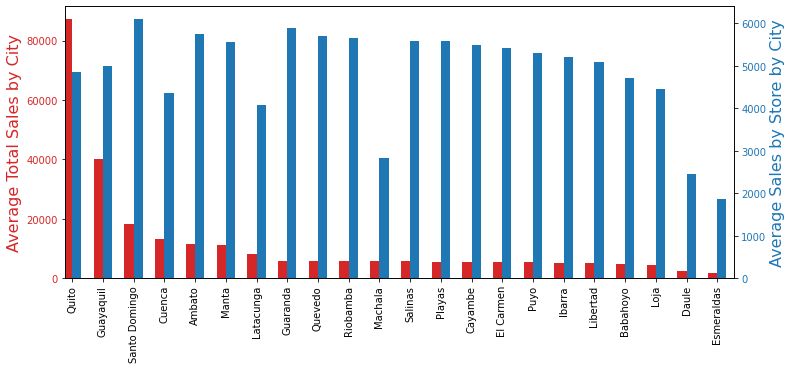

In [15]:
color1 = "tab:red"
color2 = "tab:blue"
fig, ax1 = plt.subplots(figsize=figsize)
sales_by_city_sum.plot(kind="bar",y='sum', figsize=figsize,ax=ax1,color=color1, align='edge', width=-0.3, legend=False)
ax2 = ax1.twinx()
sales_by_city_sum.plot(kind="bar",y='mean',figsize=figsize,ax=ax2,color=color2, align='edge', width=0.3,  legend=False)
############# Style Set up ###############
ax1.set_ylabel('Average Total Sales by City', color=color1, fontsize=16)
ax1.tick_params(axis='y', labelcolor=color1)
ax2.set_ylabel('Average Sales by Store by City', color=color2, fontsize=16)  
ax2.tick_params(axis='y', labelcolor=color2)

Average Sales by City : 
1. Looking at the graph, we can see that Santo Domingo has the highest daily average sales wrt city. It is followed by Guaranda city.
2. Whereas, Quito also has the high daily-average sales both per city and per store. 

##### Visualization of Seasonality and Trend

It would be good to know how the sales behave at different times to understand their seosonality and the overall trend. Seasonalities include each season, monthly and quarterly.

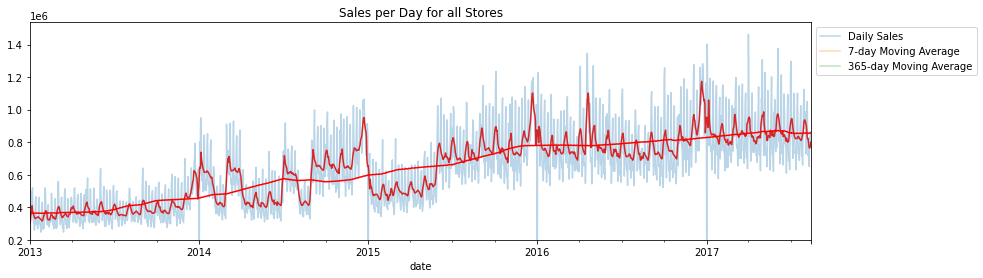

In [16]:
sales_grouped  = train_data.groupby('date').agg({'sales':'sum'}).to_period("D")
sales_grouped['week']      = sales_grouped.index.week
sales_grouped['year']      = sales_grouped.index.year
sales_smooth7  = sales_grouped.copy()
sales_smooth365= sales_grouped.copy()
sales_smooth7["sales"]   = sales_smooth7.  sales.rolling(window=7,  center=True, min_periods=3 ).mean()
sales_smooth365["sales"] = sales_smooth365.sales.rolling(window=365,center=True, min_periods=183).mean()


figsize = (14,4)
fig, ax = plt.subplots(figsize=figsize)
sales_grouped. plot(ax=ax, alpha=0.3)
sales_smooth7. plot(ax=ax)
sales_smooth365.plot(ax=ax, color="r")
ax.legend(["Daily Sales","7-day Moving Average","365-day Moving Average"],bbox_to_anchor=(1.0, 1.0))
ax.set(ylim=2e5, title="Sales per Day for all Stores")
plt.show()

Based on the above graph, we could see that the sales are always peaking during New Years Eve.

#####  Analysis based on different attribute values by time

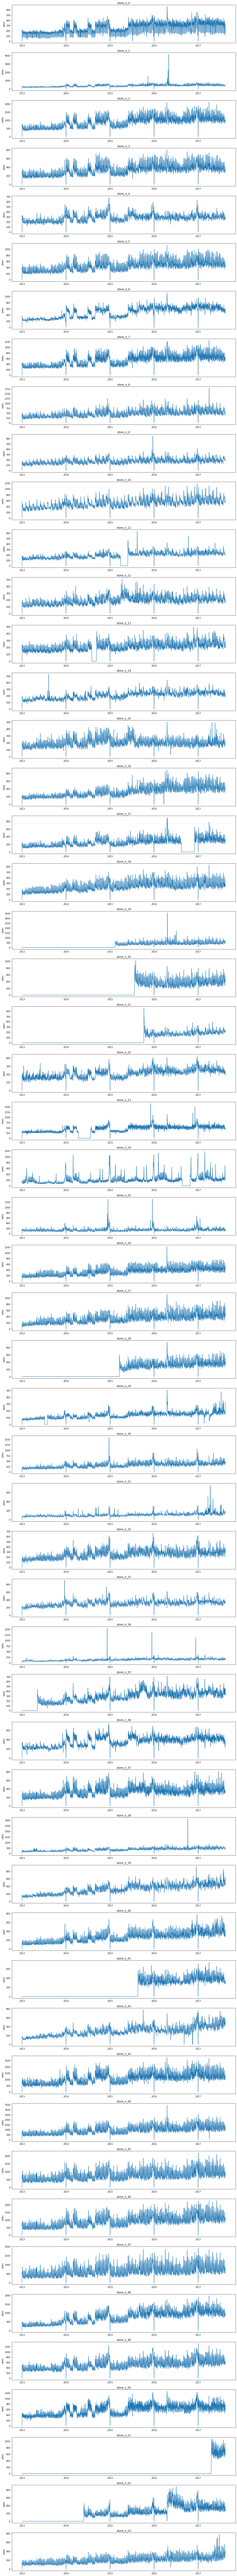

In [17]:
date_list = {}
date_list['date_start_train'] = '2013-01-01'
date_list['date_end_train'] = '2017-08-15'
date_list['date_start_test'] = '2017-08-16'
date_list['date_end_test'] = '2017-08-31'
date_list['date_start_fore'] = '2016-06-01'

diff_train = (pd.Timestamp(date_list['date_end_train']) - pd.Timestamp(date_list['date_start_fore'])).days
diff_test = (pd.Timestamp(date_list['date_end_test']) - pd.Timestamp(date_list['date_start_fore'])).days

orig_test = pd.read_csv(path + "test.csv", parse_dates=['date'])
orig_stores = pd.read_csv(path + "stores.csv")

orig_train = pd.read_csv(path + "train.csv", parse_dates=['date'])
fig, axes = plt.subplots(54, 1, figsize=(15, 54*3))

for ax, i in zip(axes.flat, np.arange(0,54,1)):
    sns.lineplot(ax=axes[i], x=orig_train[orig_train.store_nbr==(i+1)].groupby(by='date')['sales'].mean().reset_index().date.values, y=orig_train[orig_train.store_nbr==(i+1)].groupby(by='date')['sales'].mean())
    ax.set_title(f'store_n_{i}') 
    
fig.tight_layout()

In [18]:
# Defining function for store and adding features to it
orig_stores.groupby(by=['city']).store_nbr.nunique().sort_values(ascending=False)

def store_func (orig_df):
    
    df = orig_df.copy()
    
    # Adding features to orig_stores
    df['uniquestore'] = df.city.apply(lambda x: 0 if x in ['Quito', 'Guayaquil', 'Santo Domingo', 'Cuenca', 'Manta', 'Machala', 'Latacunga', 'Ambato'] else 1)
    df['newstore'] = df.store_nbr.apply(lambda x: 1 if x in [19, 20, 21, 28, 35, 41, 51, 52] else 0)
        
    # Merging orig_stores, orig_test and orig_train
    df = pd.concat([orig_train, orig_test], axis=0).merge(df, on=['store_nbr'], how='left')
    df = df.rename(columns={'type' : 'store'}) 

    return df

# Adding the store function to the final dataframe
final_df = store_func (orig_stores)

orig_holidays_events = pd.read_csv(path + "holidays_events.csv", parse_dates=['date'])
orig_holidays_events.query("type=='Event'").description.value_counts()

Dia de la Madre                                    5
Mundial de futbol Brasil: Octavos de Final         4
Black Friday                                       3
Cyber Monday                                       3
Mundial de futbol Brasil: Cuartos de Final         2
Mundial de futbol Brasil: Semifinales              2
Terremoto Manabi+21                                1
Terremoto Manabi+14                                1
Terremoto Manabi+15                                1
Terremoto Manabi+16                                1
Terremoto Manabi+17                                1
Terremoto Manabi+18                                1
Terremoto Manabi+19                                1
Terremoto Manabi+20                                1
Terremoto Manabi+24                                1
Terremoto Manabi+22                                1
Terremoto Manabi+23                                1
Terremoto Manabi+12                                1
Terremoto Manabi+25                           

##### Plotting the graph for Sales data from 2016-12-01 to 2017-02-01 from the training dataset

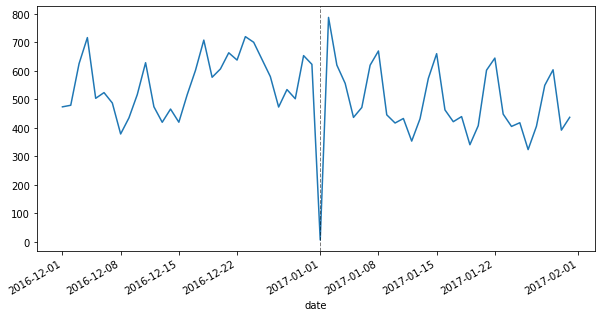

In [19]:
fig = plt.figure(figsize=(10,5))
orig_train.query("(date.dt.year==2017 and date.dt.month==1) or (date.dt.year==2016 and date.dt.month==12)").groupby(by='date')['sales'].mean().plot()
plt.axvline(x=pd.Timestamp('2017-01-01'), color='black', linestyle='--', linewidth=1, alpha=0.5)

In [20]:
# Defining function for holidays_events and adding features to it
def holiday_func (orig_df):
    
    df = orig_df.copy()
    
    # Non-transferred events
    df.loc[297, 'transferred'] = df.loc[297, 'transferred'] = False
    df = df.query("transferred!=True")
    
    # Removing duplicates
    df = df.drop(index=orig_holidays_events[orig_holidays_events[['date', 'locale_name']].duplicated()].index.values)

    # Adding event type
    df.loc[df.type=='Event', 'type'] = df.description.apply(lambda x: x[0:7])
     
    # Merging orig_holidays_events and final_df
    nat_df = df.query("locale=='National'")
    loc_df = df.query("locale=='Local'")
    reg_df = df.query("locale=='Regional'")
    
    df = final_df.merge(nat_df, left_on=['date'], right_on=['date'], how='left')
    df = df.merge(loc_df, left_on=['date', 'city'], right_on=['date', 'locale_name'], how='left')
    df = df.merge(reg_df, left_on=['date', 'state'], right_on=['date', 'locale_name'], how='left')
   
    # Adding New Year
    df['firstday'] = df.description_x.apply(lambda x: 1 if x=='Primer dia del ano' else 0)

    # Matching event and store
    df = df.drop(columns=['locale_x', 'locale_name_x', 'description_x', 'transferred_x',
                          'locale_y', 'locale_name_y', 'description_y', 'transferred_y',
                          'locale', 'locale_name', 'description', 'transferred'])
    df.loc[~df.type_x.isnull(), 'event_type'] = df.type_x.apply(lambda x: x)
    df.loc[~df.type_y.isnull(), 'event_type'] = df.type_y.apply(lambda x: x)
    df.loc[~df.type.isnull(), 'event_type'] = df.type.apply(lambda x: x)
    df.loc[df.event_type.isnull(), 'event_type'] = df.event_type.apply(lambda x: 'norm')
    df = df.drop(columns=['type_x', 'type_y', 'type'])

    df['isevent'] = df.event_type.apply(lambda x: 'y' if x!='norm' else 'n')

    # Adding Easter
    df.loc[df.date.isin(['2017-04-16', '2016-03-27', '2015-04-05', '2014-04-20', '2013-03-31']), 'isevent'] = df.isevent.apply(lambda x: 'y')
    df.loc[df.date.isin(['2017-04-16', '2016-03-27', '2015-04-05', '2014-04-20', '2013-03-31']), 'event_type'] = df.event_type.apply(lambda x: 'Holiday')

    # Adding closure days
    df['isclosed'] = df.groupby(by=['date', 'store_nbr'])['sales'].transform(lambda x: 1 if x.sum()==0 else 0)    
    df.loc[(df.date.dt.year==2017) & (df.date.dt.month==8) & (df.date.dt.day>=16) , 'isclosed'] = df.isclosed.apply(lambda x: 0)    
    df.loc[df.date.isin(['2017-01-01']), 'isevent'] = df.isevent.apply(lambda x: 'n')
  
    return df

# Adding holiday function to the final dataframe
final_df = holiday_func(orig_holidays_events)
final_df

,id,date,store_nbr,family,sales,onpromotion,city,state,str_type,cluster,uniquestore,newstore,firstday,event_type,isevent,isclosed
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,0,0,1,Holiday,y,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,0,0,1,Holiday,y,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,0,0,1,Holiday,y,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,0,0,1,Holiday,y,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,0,0,1,Holiday,y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,Quito,Pichincha,B,6,0,0,0,norm,n,0
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,0,0,0,norm,n,0
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,Quito,Pichincha,B,6,0,0,0,norm,n,0
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,Quito,Pichincha,B,6,0,0,0,norm,n,0


##### Plotting the graph for Oil prices over the years

<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

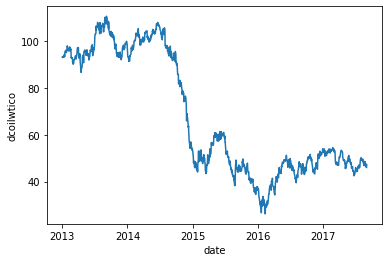

In [21]:
orig_oil = pd.read_csv(path + "oil.csv", parse_dates=['date'])
sns.lineplot(y=orig_oil.dcoilwtico, x=orig_oil.date)

In [22]:
orig_oil.set_index('date').resample("D").mean().isnull().sum()
# Defining function for oil and adding features to it
def oil_func (orig_df):
    
    df = orig_df.copy()
    
    # Adding missing values
    df = df.set_index('date').resample("D").mean().interpolate(limit_direction='backward').reset_index()
    
    # Adding new features
    df['lagoil_1_dcoilwtico'] = df['dcoilwtico'].shift(1)
    df['lagoil_2_dcoilwtico'] = df['dcoilwtico'].shift(2)
    df['lagoil_3_dcoilwtico'] = df['dcoilwtico'].shift(3)
    df['lagoil_4_dcoilwtico'] = df['dcoilwtico'].shift(4)
    df['oil_week_avg'] = df['dcoilwtico'].rolling(7).mean()

    df.dropna(inplace = True)
    
    # Merging orig_oil and final_df
    df = final_df.merge(df, on=['date'], how='left')
    
    return df

# Adding oil function to the final dataframe
final_df = oil_func(orig_oil)

In [23]:
orig_transactions = pd.read_csv(path + "transactions.csv", parse_dates=['date'])
# Defining function for transactions and adding features to it
def transactions_func (orig_df):
    
    df = orig_df.copy()
    
    # Merging orig_transactions and final_df
    df = final_df.merge(df, on=['date', 'store_nbr'], how='left')
    
    # Filling missing values
    df.loc[(df.transactions.isnull()) & (df.isclosed==1), 'transactions'] = df.transactions.apply(lambda x: 0)
    group_df = df.groupby(by=['store_nbr', 'date']).transactions.first().reset_index()
    group_df['avg_tra'] = group_df.transactions.rolling(15, min_periods=10).mean()
    group_df.drop(columns='transactions', inplace=True)
    df = df.merge(group_df, on=['date', 'store_nbr'], how='left')
    df.loc[(df.transactions.isnull()) & (df.isclosed==0), 'transactions'] = df.avg_tra
    df.drop(columns='avg_tra', inplace=True)
    df.loc[(df.date.dt.year==2017) & (df.date.dt.month==8) & (df.date.dt.day>=16) , 'transactions'] = df.transactions.apply(lambda x: None)    

    df['tot_store_day_onprom'] = df.groupby(by=['date', 'store_nbr']).onpromotion.transform(lambda x: x.sum())

    return df

# Adding transactions function to the final dataframe
final_df = transactions_func(orig_transactions)

<AxesSubplot:xlabel='date'>

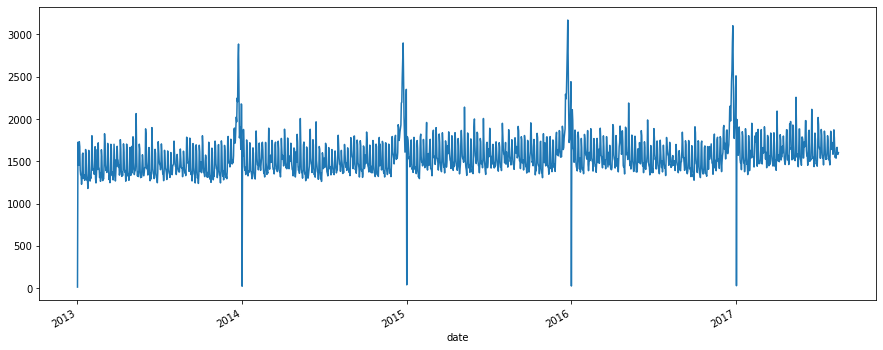

In [24]:
##### Plotting a graph for transactions over the years
fig = plt.figure(figsize=(15,6))
final_df.groupby(by='date')['transactions'].mean().plot()

In [25]:
# Delecting all the previous objects
del orig_train
del orig_test
del orig_stores
del orig_holidays_events
del orig_oil
del orig_transactions

## Phase II : Data Pre-processing

##### 1. Handling the NULL values in oil.csv and holiday.csv

After checking for NULL values, we found out that there are a lot in oil.csv, for the oil prices. Hence, before proceeding further, we will be handling these NULL values using the "mean" of the values before it and of the one after it.
Also, we are using outer join when merging original data and holiday, which means there will be NULL value if the day is not a holiday.

In [26]:
#Fetching the data from the csv file
output1_ = pd.read_csv(path + 'final_.csv', index_col=False)

#fill NaN of dcoilwtico using average of the nearest values
price = 93.14 
output1_['dcoilwtico1'] = 0
output1_['dcoilwtico2'] = 0

for i in range(output1_.shape[0]):
    if output1_['dcoilwtico'].iloc[i] > 0:
        output1_['dcoilwtico1'].iloc[i] = output1_['dcoilwtico'].iloc[i].copy()
        price = output1_['dcoilwtico'].iloc[i].copy()
    else:
        output1_['dcoilwtico1'].iloc[i] = price
        
for i in range(output1_.shape[0]):
    if output1_['dcoilwtico'].iloc[output1_.shape[0]-1-i] > 0:
        output1_['dcoilwtico2'].iloc[output1_.shape[0]-1-i] = output1_['dcoilwtico'].iloc[output1_.shape[0]-1-i].copy()
        price = output1_['dcoilwtico'].iloc[output1_.shape[0]-1-i].copy()
    else:
        output1_['dcoilwtico2'].iloc[output1_.shape[0]-1-i] = price
        
output1_['dcoilwtico'] = (output1_['dcoilwtico1']+output1_['dcoilwtico2'])/2
output1_.drop(columns=['dcoilwtico1', 'dcoilwtico2'],inplace=True)

#fill NULL for holiday
output1_ = output1_.fillna('NULL')
  
#Saving our combined csv data as a new file
output1_.to_csv(path + 'preprossed_.csv', index=False)

# displaying result
output1_.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,NULL,NULL,NULL,NULL
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,NULL,NULL,NULL,NULL
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,NULL,NULL,NULL,NULL
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,NULL,NULL,NULL,NULL
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,NULL,NULL,NULL,NULL


In [27]:
#Fetching the data from the csv file
output1= pd.read_csv(path + 'final.csv', index_col=False)

#fill NaN of dcoilwtico using average of the nearest values
price = 93.14 
output1['dcoilwtico1'] = 0
output1['dcoilwtico2'] = 0

for i in range(output1.shape[0]):
    if output1['dcoilwtico'].iloc[i] > 0:
        output1['dcoilwtico1'].iloc[i] = output1['dcoilwtico'].iloc[i].copy()
        price = output1['dcoilwtico'].iloc[i].copy()
    else:
        output1['dcoilwtico1'].iloc[i] = price
        
for i in range(output1.shape[0]):
    if output1['dcoilwtico'].iloc[output1.shape[0]-1-i] > 0:
        output1['dcoilwtico2'].iloc[output1.shape[0]-1-i] = output1['dcoilwtico'].iloc[output1.shape[0]-1-i].copy()
        price = output1['dcoilwtico'].iloc[output1.shape[0]-1-i].copy()
    else:
        output1['dcoilwtico2'].iloc[output1.shape[0]-1-i] = price
        
output1['dcoilwtico'] = (output1['dcoilwtico1']+output1['dcoilwtico2'])/2
output1.drop(columns=['dcoilwtico1', 'dcoilwtico2'],inplace=True)

#fill NULL for holiday
output1_ = output1_.fillna('NULL')

#Saving our combined csv data as a new file
output1.to_csv(path + 'preprossed.csv', index=False)

# displaying result
output1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False


##### 2. Extracting the value from "date" column 

Since this is a time series problem, most of the time, the values follow a certain pattern. Our goal is to find this pattern. When a certain year passes, it never appears again. However, months have a one-year cycle, and also days of the week occur weekly.

In [28]:
date_separation = pd.read_csv(path + 'preprossed.csv',index_col=False)
#date_separation['year'] = pd.DatetimeIndex(date_separation['date']).year
date_separation['month'] = pd.DatetimeIndex(date_separation['date']).month
date_separation['dayofweek'] = pd.DatetimeIndex(date_separation['date']).dayofweek
date_separation = date_separation.drop(['id'], axis=1)
date_separation = date_separation.drop(['date'], axis=1)

#Saving our combined csv data as a new file
date_separation = date_separation.fillna('NULL')
date_separation.to_csv(path + 'preprossed1.csv', index=False)

# displaying result
print(date_separation.shape)
date_separation.tail()

(3054348, 15)


,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred,month,dayofweek
3054343,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054344,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054345,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054346,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054347,9,SEAFOOD,16.000,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1


In [29]:
date_separation_ = pd.read_csv(path + 'preprossed_.csv',index_col=False)
#date_separation_['year'] = pd.DatetimeIndex(date_separation_['date']).year
date_separation_['month'] = pd.DatetimeIndex(date_separation_['date']).month
date_separation_['dayofweek'] = pd.DatetimeIndex(date_separation_['date']).dayofweek
date_separation_ = date_separation_.drop(['id'], axis=1)
date_separation_ = date_separation_.drop(['date'], axis=1)

#Saving our combined csv data as a new file
date_separation_ = date_separation_.fillna('NULL')
date_separation_.to_csv(path + 'preprossed1_.csv', index=False)

# displaying result
print(date_separation_.shape)
date_separation_.tail()

(28512, 14)


,store_nbr,family,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred,month,dayofweek
28507,9,POULTRY,1,47.26,Quito,Pichincha,B,6,NULL,NULL,NULL,NULL,8,3
28508,9,PREPARED FOODS,0,47.26,Quito,Pichincha,B,6,NULL,NULL,NULL,NULL,8,3
28509,9,PRODUCE,1,47.26,Quito,Pichincha,B,6,NULL,NULL,NULL,NULL,8,3
28510,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,Quito,Pichincha,B,6,NULL,NULL,NULL,NULL,8,3
28511,9,SEAFOOD,0,47.26,Quito,Pichincha,B,6,NULL,NULL,NULL,NULL,8,3


## Phase III :  Model Training

#### 1. Ridge Regression

In [30]:
train_data = pd.read_csv(path + 'preprossed1.csv')
test_data = pd.read_csv(path + 'preprossed1_.csv')
train_data = train_data.fillna('NULL')
test_data = test_data.fillna('NULL')
train_data.shape

(3054348, 15)

In [31]:
#train_data = train_data.astype({"cluster": str, "month": str, "dayofweek": str})
print(train_data.dtypes)
train_data

store_nbr        int64
family          object
sales          float64
onpromotion      int64
dcoilwtico     float64
city            object
state           object
str_type        object
cluster          int64
type            object
locale          object
locale_name     object
transferred     object
month            int64
dayofweek        int64
dtype: object


,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred,month,dayofweek
0,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False,1,1
1,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False,1,1
2,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False,1,1
3,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False,1,1
4,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054344,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054345,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1
3054346,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,False,8,1


In [32]:
total_train_data = pd.get_dummies(train_data)
total_test_data = pd.get_dummies(test_data)

# Get missing columns in the training test
missing_cols = set( total_train_data.columns ) - set( total_test_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    total_test_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
total_test_data = total_test_data[total_train_data.columns]

In [33]:
#total_train_data = pd.get_dummies(train_data)
x_train = total_train_data.drop(['sales'], axis=1)
y_train = total_train_data['sales']
x_train.to_csv(path + 'x_train.csv', index=False)

In [34]:
#total_test_data = pd.get_dummies(test_data)
x_test = total_test_data.drop(['sales'], axis=1)
x_test.to_csv(path + 'x_test.csv', index=False)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(3054348, 121)
(3054348,)
(28512, 121)


In [36]:
import time
from sklearn.linear_model import Ridge
ri = Ridge(alpha=1.0)
start_time = time.time()
model_ri = ri.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.034386396408081 seconds ---


In [37]:
prediction_ri = model_ri.predict(x_test)

In [38]:
answer_ri = pd.read_csv(path + 'sample_submission.csv')
prediction_ri[prediction_ri < 0] = 0
answer_ri['sales'] = prediction_ri
#answer_ri = answer_ri.round()
#answer_ri = answer_ri.astype(int)
answer_ri.to_csv('answer_RidgeRegressor.csv', index=False)
answer_ri

,id,sales
0,3000888,64.990530
1,3000889,59.928397
2,3000890,96.004306
3,3000891,2629.178990
4,3000892,59.897875
...,...,...
28507,3029395,432.334343
28508,3029396,197.164983
28509,3029397,1267.424688
28510,3029398,265.497555


Ridge Regressor : 
The result for this model, Root Mean Squared Logarithmic Error = 1.98722. Which is quite unacceptable, obviously this kind of linear regression is too simple to our dataset.

#### 2. Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
start_time = time.time()
model_dt.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 142.56267666816711 seconds ---


In [40]:
prediction_dt = model_dt.predict(x_test)
prediction_dt[prediction_dt < 0] = 0

In [41]:
answer_dt = pd.read_csv(path + 'sample_submission.csv')
answer_dt['sales'] = prediction_dt
#answer_dt = answer_dt.round()
#answer_dt = answer_dt.astype(int)
answer_dt.to_csv('answer_DecisionTreeRegressor.csv', index=False)
answer_dt

,id,sales
0,3000888,4.000
1,3000889,0.000
2,3000890,6.000
3,3000891,2010.000
4,3000892,0.000
...,...,...
28507,3029395,425.946
28508,3029396,49.000
28509,3029397,1353.040
28510,3029398,22.000


DecisionTreeRegressor : The result for this model, Root Mean Squared Logarithmic Error = 0.75789. This is a big improvement over the last one, and we're heading in the right direction to make our predictions more accurate.

#### 3. Random Forest Regressor

In [42]:
'''
from sklearn import ensemble
rf = ensemble.RandomForestRegressor(
    n_estimators=300,
    max_depth=2,
    random_state=42
)
model_rf = rf.fit(x_train, y_train)

prediction_rf = model_rf.predict(x_test)
prediction_rf[prediction_rf < 0] = 0

answer_rf = pd.read_csv(path + 'sample_submission.csv')
answer_rf['sales'] = prediction_rf
#answer_rf = answer_rf.round()
#answer_rf = answer_rf.astype(int)
answer_rf.to_csv(path + 'answer_RandomForestRegressor.csv', index=False)
answer_rf
'''

"\nfrom sklearn import ensemble\nrf = ensemble.RandomForestRegressor(\n    n_estimators=300,\n    max_depth=2,\n    random_state=42\n)\nmodel_rf = rf.fit(x_train, y_train)\n\nprediction_rf = model_rf.predict(x_test)\nprediction_rf[prediction_rf < 0] = 0\n\nanswer_rf = pd.read_csv(path + 'sample_submission.csv')\nanswer_rf['sales'] = prediction_rf\n#answer_rf = answer_rf.round()\n#answer_rf = answer_rf.astype(int)\nanswer_rf.to_csv(path + 'answer_RandomForestRegressor.csv', index=False)\nanswer_rf\n"

RandomForestRegressor : This model is an advanced version of DecisionTreeRegressor. However, the training took a lot longer than we expected and it doesn't look like we can train the model using our own laptop.

---------------------------------------------------

#### 4. Linear Regression with Random Forest

In order to use RandomForestRegressor, we need to do data preprocessing again using another method. Since we have over 3 million data in our file, we need to somehow split the data and train the model separately so that it takes less time, we just need to combine all the final results to make the final answer.

In [43]:
final_df = final_df.set_index('date').loc[date_list['date_start_fore']:,:]

In [44]:
# Grouping the final dataframe by city. Calculating the sum of the sales values and sorting it
final_df.groupby(by=['city']).sales.sum().sort_values(ascending=False)

city
Quito            1.850662e+08
Guayaquil        4.155775e+07
Cuenca           1.876670e+07
Ambato           1.281856e+07
Santo Domingo    1.269997e+07
Machala          1.196877e+07
Cayambe          8.777466e+06
Manta            8.358425e+06
Daule            6.602861e+06
Latacunga        6.398649e+06
Babahoyo         5.761306e+06
Esmeraldas       5.670225e+06
Loja             5.594267e+06
Libertad         5.262370e+06
Quevedo          4.214665e+06
Guaranda         4.016079e+06
El Carmen        3.845282e+06
Ibarra           3.554110e+06
Riobamba         3.546952e+06
Salinas          3.400954e+06
Puyo             2.750583e+06
Playas           2.440016e+06
Name: sales, dtype: float64

In [45]:
# Grouping the final dataframe for a particular city i.e. "Quito" and 
# calculating the sales values based on the "store_nbr" and sorting it
final_df.query("city=='Quito'").groupby(by=['store_nbr']).sales.sum().sort_values(ascending=False)

store_nbr
44    2.010697e+07
45    1.818568e+07
47    1.692969e+07
3     1.666236e+07
49    1.590922e+07
46    1.338731e+07
48    1.125256e+07
8     1.004547e+07
7     9.107902e+06
9     8.298435e+06
6     8.061466e+06
2     6.845936e+06
20    6.756991e+06
17    6.443996e+06
4     6.017441e+06
1     4.651113e+06
18    3.621918e+06
10    2.781731e+06
Name: sales, dtype: float64

In [46]:
# Calculating the sum of the sales in each cluster of stores
final_df.groupby(by=['cluster']).sales.sum().sort_values(ascending=False)

cluster
14    5.076277e+07
6     4.127568e+07
11    3.679107e+07
8     3.581573e+07
10    3.064024e+07
13    2.522077e+07
3     2.430911e+07
5     2.010697e+07
1     1.787748e+07
15    1.675057e+07
4     1.543991e+07
2     1.170915e+07
17    1.036647e+07
9     9.642782e+06
12    6.443996e+06
7     6.297535e+06
16    3.621918e+06
Name: sales, dtype: float64

In [47]:
# Grouping the final dataframe based on the "product family" and calculating the sum of the sales and sorting it
final_df.groupby(by=['family']).sales.sum().sort_values(ascending=False)

family
GROCERY I                     1.076903e+08
BEVERAGES                     7.980141e+07
PRODUCE                       5.471677e+07
CLEANING                      2.868959e+07
DAIRY                         2.145715e+07
BREAD/BAKERY                  1.292329e+07
POULTRY                       9.196818e+06
MEATS                         8.696725e+06
PERSONAL CARE                 7.498256e+06
DELI                          7.272648e+06
HOME CARE                     7.039159e+06
EGGS                          4.605960e+06
FROZEN FOODS                  4.059254e+06
PREPARED FOODS                2.431409e+06
LIQUOR,WINE,BEER              2.312182e+06
HOME AND KITCHEN I            7.806920e+05
HOME AND KITCHEN II           6.555480e+05
GROCERY II                    5.559580e+05
SEAFOOD                       5.341888e+05
CELEBRATION                   3.304340e+05
LAWN AND GARDEN               2.829960e+05
LADIESWEAR                    2.761220e+05
PLAYERS AND ELECTRONICS       2.626510e+05
PET 

#### The Model Implementation

In [48]:
# Defining the split function for splitting the training and testing data
def split_func (orig_df, X, y, end_date, test_size):
    
    # Splitting train and test
    idx_train, idx_test = train_test_split(orig_df.index, test_size=test_size, shuffle=False)
    X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
    y_train, y_test = y.loc[idx_train], y.loc[idx_test]
    
    return X_train, y_train, X_test, y_test

In [49]:
# Defining function for adding features to the model
def add_features (orig_df):
    
    df = orig_df.copy()
        
    # Time features
    df['year'] = df.index.year.astype('int')
    df['quarter'] = df.index.quarter.astype('int')
    df['month'] = df.index.month.astype('int')
    df['day'] = df.index.day.astype('int')
    df['dayofweek'] = df.index.day_of_week.astype('int')
    df['weekofyear'] = df.index.week.astype('int')
    df['isweekend'] = df.dayofweek.apply(lambda x: 1 if x in (5,6) else 0)
    df['startschool'] = df.month.apply(lambda x: 1 if x in (4,5,8,9) else 0)
    
    df['daysinmonth'] = df.index.days_in_month.astype('int')

    # Dummy features
    df = pd.get_dummies(df, columns=['year'], drop_first=True)
    df = pd.get_dummies(df, columns=['quarter'], drop_first=True)
    df = pd.get_dummies(df, columns=['dayofweek'], drop_first=True)
    df = pd.get_dummies(df, columns=['str_type'], drop_first=True)
    df = pd.get_dummies(df, columns=['event_type'], drop_first=True)
    df = pd.get_dummies(df, columns=['isevent'], drop_first=True)
    df = pd.get_dummies(df, columns=['state'], drop_first=True)

    # DeterministicProcess
    fourierA = CalendarFourier(freq='A', order=5)
    fourierM = CalendarFourier(freq='M', order=2)
    fourierW = CalendarFourier(freq='W', order=4)

    dp = DeterministicProcess(index=df.index,
                          order=1,
                          seasonal=False,
                          constant=False,
                          additional_terms=[fourierA, fourierM, fourierW],
                          drop=True)
    dp_df = dp.in_sample()
    df = pd.concat([df, dp_df], axis=1)
    
    # Outliers
    df['outliers'] = df.sales.apply(lambda x: 1 if x>30000 else 0)
    
    df.drop(columns=['daysinmonth', 'month', 'city'], inplace=True)
    
    return df

In [50]:
# Defining the model function
def model_func (orig_df, end_df, n):
    
    df = add_features(orig_df).loc[:end_df,:].reset_index().set_index(['store_nbr', 'family', 'date']).sort_index()
    y = np.log1p(df.loc[:,'sales'].unstack(['store_nbr', 'family']))
    
    # Selecting features
    cols = df.columns[df.columns.str.match(r'year|quarter|event|isevent|isclosed|oil\_week|dcoilwtico|week|isweek|startschool|sin|cos|trend')]
    X = df.loc[:,cols]
    X = X.groupby(by='date').first()
    
    X_tr, y_tr, X_te, y_te = split_func(y, X, y, end_df, n)
    
    # Train
    if end_df <= date_list['date_end_train']:
        y_tr = np.empty((diff_train-n,0))
        y_te = np.empty((n,0))
        pred_train_y = np.empty((diff_train-n,0))
        pred_test_y = np.empty((n,0))
    # Test
    else:
        y_tr = np.empty((diff_test-n,0))
        y_te = np.empty((n,0))
        pred_train_y = np.empty((diff_test-n,0))
        pred_test_y = np.empty((n,0))
    
    # A model for each store
    for i in orig_df.store_nbr.unique():
        y = df.loc[i,'sales'].unstack(['family'])
        X = df.loc[i,cols]
        X = X.groupby(by='date').first()

        # Splitting train and test and log transformation
        X_train, y_train, X_test, y_test = split_func(y, X, np.log1p(y), end_df, n)
        
        # Linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        lr_pred_train_y = model.predict(X_train) 
        lr_pred_test_y = model.predict(X_test)
        
        # Random Forest
        model = RandomForestRegressor(n_estimators=320, random_state=0)
        model.fit(X_train, y_train)
        rf_pred_train_y = model.predict(X_train) 
        rf_pred_test_y = model.predict(X_test)
        
        # Average result
        st_pred_train_y = lr_pred_train_y * 0.6 + rf_pred_train_y * 0.4
        st_pred_test_y = lr_pred_test_y * 0.6 + rf_pred_test_y * 0.4
        
        y_tr = np.append(y_tr, y_train, axis=1)
        y_te = np.append(y_te, y_test, axis=1)
        pred_train_y = np.append(pred_train_y, st_pred_train_y, axis=1)
        pred_test_y = np.append(pred_test_y, st_pred_test_y, axis=1)
        
        # Performances of each shop
        # Train
        if end_df <= date_list['date_end_train']:
            print(f'RMSLE_train st_n {i}: ', np.round(np.sqrt(mean_squared_error(y_train.clip(0.0), st_pred_train_y.clip(0.0))), 4), f'RMSLE_test st_n {i}: ', np.round(np.sqrt(mean_squared_error(y_test.clip(0.0), st_pred_test_y.clip(0.0))), 4))
        # Test
        else:
            print(f'RMSLE_train st_n {i}: ', np.round(np.sqrt(mean_squared_error(y_train.clip(0.0), st_pred_train_y.clip(0.0))), 4))
        
    iterables = [final_df.store_nbr.unique(), final_df.family.sort_values().unique()]
    index = pd.MultiIndex.from_product(iterables, names=['store_nbr', 'family'])
    
    y_tr = pd.DataFrame(y_tr, columns=index, index=X_tr.index)
    y_te = pd.DataFrame(y_te, columns=index, index=X_te.index)
    pred_train_y = pd.DataFrame(pred_train_y, columns=y_tr.columns, index=y_tr.index)
    pred_test_y = pd.DataFrame(pred_test_y, columns=y_te.columns, index=y_te.index)
    
    # Total performances
    # Train
    if end_df <= date_list['date_end_train']:
        print(f'RMSLE_train tot: ', np.round(np.sqrt(mean_squared_error(y_tr.clip(0.0), pred_train_y.clip(0.0))), 4), f'RMSLE_test tot: ', np.round(np.sqrt(mean_squared_error(y_te.clip(0.0), pred_test_y.clip(0.0))), 4))
    # Test
    else:
        print(f'RMSLE_train tot: ', np.round(np.sqrt(mean_squared_error(y_tr.clip(0.0), pred_train_y.clip(0.0))), 4)) 
   
    y_tr = y_tr.stack(['store_nbr', 'family'])
    y_te = y_te.stack(['store_nbr', 'family'])
    y = pd.concat([y_tr, y_te])
    
    pred_train_y = pred_train_y.stack(['store_nbr', 'family'])
    pred_test_y = pred_test_y.stack(['store_nbr', 'family'])
    # If sales < 0 -> 0
    pred_y = pd.concat([pd.Series(pred_train_y).apply(lambda x: 0 if x<0 else x), pd.Series(pred_test_y).apply(lambda x: 0 if x<0 else x)])
    
    # Train
    if end_df <= date_list['date_end_train']:

        # Some plots to check 
        fig, axes = plt.subplots(4, 2, figsize=(15,10))
        y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum().plot(ax=axes[0,0], color="red")
        pred_y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum().plot(ax=axes[0,0], color="orange")
    
        y.loc['2017-08':,:].reset_index().groupby(by='date')[0].sum().plot(ax=axes[0,1], color="red")
        pred_y.loc['2017-08':,:].reset_index().groupby(by='date')[0].sum().plot(ax=axes[0,1], color="orange")
    
        y.loc['2017-02':,:].reset_index().query("family=='GROCERY I'").groupby(by='date')[0].sum().plot(ax=axes[1,0], color="red")
        pred_y.loc['2017-02':,:].reset_index().query("family=='GROCERY I'").groupby(by='date')[0].sum().plot(ax=axes[1,0], color="orange")
    
        y.loc['2017-02':,:].reset_index().query("family=='SCHOOL AND OFFICE SUPPLIES'").groupby(by='date')[0].sum().plot(ax=axes[1,1], color="red")
        pred_y.loc['2017-02':,:].reset_index().query("family=='SCHOOL AND OFFICE SUPPLIES'").groupby(by='date')[0].sum().plot(ax=axes[1,1], color="orange")
    
        (y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum() - pred_y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum()).plot(ax=axes[2,1])
        sns.residplot(ax=axes[2,0], x=pred_y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum(), y=zscore(y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum() - pred_y.loc['2017-02':,:].reset_index().groupby(by='date')[0].sum()), lowess=True, scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
        y.loc['2017-02':,:].reset_index().query("store_nbr==50").groupby(by='date')[0].sum().plot(ax=axes[3,0], color="red")
        pred_y.loc['2017-02':,:].reset_index().query("store_nbr==50").groupby(by='date')[0].sum().plot(ax=axes[3,0], color="orange")
    
        y.loc['2017-02':,:].reset_index().query("store_nbr==47").groupby(by='date')[0].sum().plot(ax=axes[3,1], color="red")
        pred_y.loc['2017-02':,:].reset_index().query("store_nbr==47").groupby(by='date')[0].sum().plot(ax=axes[3,1], color="orange")
        
        fig.tight_layout()
    # Test
    else:
        return pred_test_y, pred_y, y, df

In [51]:
start_time = time.time()
model_pred_test_y, model_pred_tot_y, orig_y, final_df = model_func(final_df, date_list['date_end_test'], 16)
print("--- %s seconds ---" % (time.time() - start_time))

RMSLE_train st_n 1:  0.266
RMSLE_train st_n 10:  0.2954
RMSLE_train st_n 11:  0.2858
RMSLE_train st_n 12:  0.2873
RMSLE_train st_n 13:  0.3032
RMSLE_train st_n 14:  0.288
RMSLE_train st_n 15:  0.2945
RMSLE_train st_n 16:  0.2901
RMSLE_train st_n 17:  0.2762
RMSLE_train st_n 18:  0.2594
RMSLE_train st_n 19:  0.3034
RMSLE_train st_n 2:  0.2534
RMSLE_train st_n 20:  0.2949
RMSLE_train st_n 21:  0.2994
RMSLE_train st_n 22:  0.2935
RMSLE_train st_n 23:  0.2782
RMSLE_train st_n 24:  0.2522
RMSLE_train st_n 25:  0.2898
RMSLE_train st_n 26:  0.3212
RMSLE_train st_n 27:  0.2669
RMSLE_train st_n 28:  0.2951
RMSLE_train st_n 29:  0.2863
RMSLE_train st_n 3:  0.2297
RMSLE_train st_n 30:  0.3045
RMSLE_train st_n 31:  0.2988
RMSLE_train st_n 32:  0.3079
RMSLE_train st_n 33:  0.2956
RMSLE_train st_n 34:  0.2978
RMSLE_train st_n 35:  0.2925
RMSLE_train st_n 36:  0.301
RMSLE_train st_n 37:  0.2586
RMSLE_train st_n 38:  0.2633
RMSLE_train st_n 39:  0.2922
RMSLE_train st_n 4:  0.2587
RMSLE_train st_n 40: 

#### Final Result :

In [52]:
y = pd.Series(np.exp(model_pred_tot_y.values) - 1, index=model_pred_tot_y.index)
sub = final_df.reset_index().set_index(['date', 'store_nbr', 'family']).sort_index().loc[date_list['date_start_fore']:, 'id']
fin_sub = pd.concat([sub, y], axis=1)
fin_sub = fin_sub.rename(columns={0:'sales'})
fin_sub['sales'] = fin_sub['sales'].apply(lambda x: 0 if x<0 else x) 
fin_sub = fin_sub.loc['2017-08-16':]
# Saving the result of the model to CSV file
fin_sub.to_csv('answer_LRwithRF.csv', index=False)